#Investigating a Dataset
###Udacity Data Analyst - Project 2

##Introduction

My name is Ronald Rihoo, and I am your data analyst for the following question:

During the TItanic disaster, were there more members of one gender who survived, relative to their own gender, compared to the other gender?

In pursuit of the answer, I have investigated a Titanic dataset that has been provided for project 2 of the Udacity Data Analyst Nanodegree program (December 2015). It contains demographics and other information about 891 individuals who were aboard the Titanic during the tragic event.

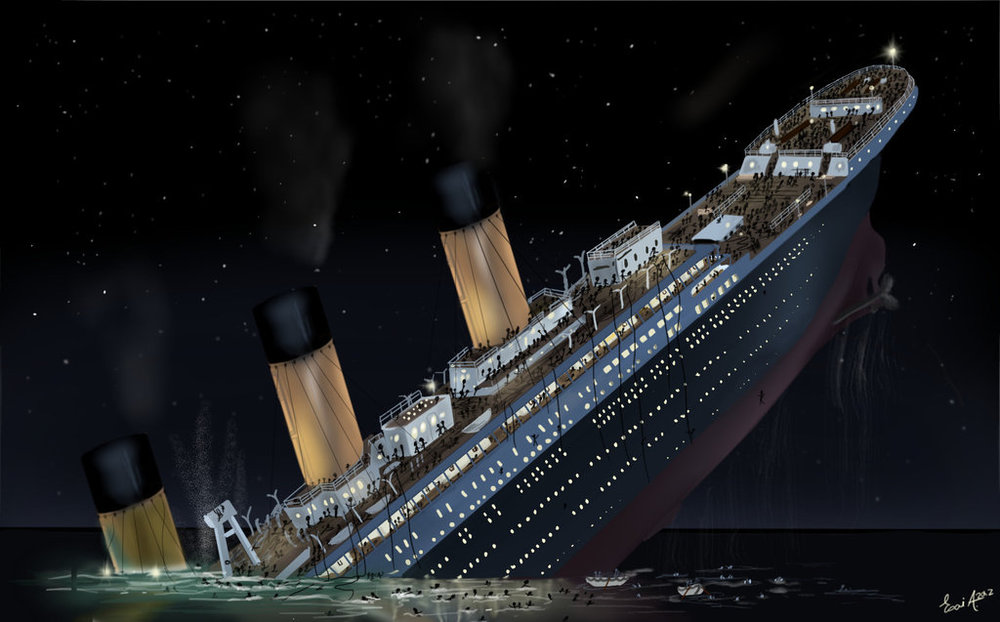

In [1]:
from IPython.display import Image
Image(filename='100_anniversary_titanic_sinking_by_Esai_Alfredo.jpg')

Esai Alfredo's artistic rendition of the Titanic's demise.

###Code Initialization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# return the value of the object's count (this shortens the code later, since it also prints the value)
def get_count(o):
    print float(o.count())
    return float(o.count())

# prints and returns the difference between two numbers (shortens the code later)
def diff(x, y):
    z = x - y                 # do the arithmetic only once, then re-use twice
    print z
    return z

# returns the percentage of x with respect to y
def percent_of(x, y):
    z = ((float(x)*100)/float(y))
    return z

# returns the combined tuple 
def add_to_tuple(x, y):
    try:
        x += (y,)
    except TypeError:
        x = (y,)
    return x

# prints the first and last n rows of a given DataFrame
def first_and_last(x, n):
    # take a peek at the first and last n items in the DataFrame
    tail = len(x) - n

    print x[:n]         # first n rows
    print x[tail:]      # last n rows
    return

def head(x, n):
    print (x[:n])
    return

def tail(x, n):
    # tail = len(x) - n
    # print x[tail:]
    print x[(len(x) - n):]
    return
    
# print count of each gender
def gender_amount_of(x, x_len, y, y_len):
    x_count = x.Age.count()
    y_count = y.Age.count()

    s_g_sum = (x_count + y_count)
    s_l_sum = (x_len + y_len)

    if (s_g_sum != s_l_sum):
        print "Error: amount of individuals, " + str(s_g_sum) + ", is not the expected quantity, " + str(s_l_sum) + ".\n"

    print "Female count: " + str(x_count)
    print "Male count:   " + str(y_count) + "\n"
    
    return

# re-orders the DataFrame; counts the quantity of individuals for each age in the DataFrame; drops all of the duplicates; 
# and resets the index, so that it looks easier on the eyes.
def clean_data(x, length, switch):
    if (switch == False):
        # sort by the 'Age' column
        x.Age.values.sort()

        # add the 'Quantity' column
        x['Quantity'] = range(len(x))

        # count the number of the associated 'Age' value in the whole 'Age' colum
        # then store the quantity in the associated row under the 'Quantity' Column
        x['Quantity'] = x.groupby('Age')['Quantity'].transform('count')

        # drop duplicates
        x.drop_duplicates(subset=['Age'], inplace=True)

        # reset index to conform to the DataFrame's length
        x = x.reset_index(drop=True)

        # turn this condition off, just in case this cell is 'run' again
        switch = True
        return x, switch
    else:
        pass

    # check for errors having occurred; if there are more or less individuals counted than expected
    if (x.Quantity.sum() < length):
        print "Error: it looks like we lost some data here. " + \
              "(Quantity sum: " + str(x.Quantity.sum()) + "; expected: " + str(length) + ")\n"
    elif (x.Quantity.sum() > length):
        print "Error: we have accounted for more people than there are in the DataFrame. " + \
              "(Quantity sum: " + str(x.Quantity.sum()) + "; expected: " + str(length) + ")\n";
    
    return

# splits the average age and prints the sum of the quantity of individuals in each half
def split_average_age(x):
    m_x = x.Age.mean()
    l_x = x.Quantity.sum()   # the sum of the 'Quantity' column gives us the amount of individuals in the DataFrame; l for length

    # by younger- and older-halfs, I mean to address halves of the 'Age' column average, and not the quantity of individuals from a total
    younger_half = x[x['Age'] <= m_x]['Quantity'].sum()       # arbitrarily decided the bounds. Here, it doesn't make any-
    older_half = x[x['Age'] > m_x]['Quantity'].sum()          # -difference which half gets the middle.

    # sanity-check
    sum_of_halves = younger_half + older_half
    if ((sum_of_halves) != l_x):
        print "Error: something's wrong; the sum of the two halves is not the expected amount. (sum: " \
              + str(sum_of_halves) + "; expected: " + str(l_x) + ")"

    # output the results for review
    print "Younger-half: " + str(younger_half)
    print "Older-half:   " + str(older_half)

    # do the thinking (logical comparison) and arithmetic (computation) for us
    if (younger_half > older_half + 1):
        print "\nThere are " + str(younger_half - older_half) + " more individuals in the younger half."
    elif (younger_half == older_half + 1):
        print "There is 1 more individual in the younger half."
    if (younger_half < older_half - 1):
        print "There are " + str(older_half - younger_half) + " more individuals in the older half."
    elif (younger_half == older_half - 1):
        print "There is 1 more individual in the older half."
        
    return


# reading the dataset
data = pd.read_csv('titanic_data.csv')

###The Dataset

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


####A quick look at some of the data statistics:

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count of the age column is 714, while the other columns have 891. So some quick data clean-up may be necessary before moving on.

####Quick data clean-up

Any row that does not include data in the 'Survived', 'Sex', and/or 'Age' columns will be dropped. It's essential to have this data in order to answer the main question. If more speculations need to be made regarding cabin location, economic stance, and/or other factors (like family relationships on-board), then the data will be cleaned up later. For now, there's no reason to miss out on data that can give us a better look at the overall picture.

In [5]:
# where a duplicate exists, drop the extra row
data.drop_duplicates(inplace=True)

# where every columns of a row is NaN, drop row
data.dropna(how = 'all', inplace=True)

# where the defined column (subset) of any row is NaN, drop row
data.dropna(subset=['Survived'], how = 'any', inplace=True)
data.dropna(subset=['Sex'], how = 'any', inplace=True)
data.dropna(subset=['Age'], how = 'any', inplace=True)

####Another look at the data statistics:

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Take note of the changes.

###Relationship between Age and Fare

####Observing the relationship of age and fare, with average fare specified by a vertical line and average age with a horizontal line:

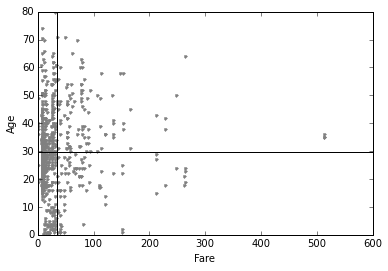

In [7]:
plt.plot(data['Fare'], data['Age'], '.', color='gray')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.axhline(data.Age.mean(), color='black')
plt.axvline(data.Fare.mean(), color='black')
plt.show()

Let's look at the outliers who paid more than $500 for their fare. We may want to drop them from the averages, since they are so far off from everyone else.

In [8]:
print data[['Age', 'Sex', 'Fare', 'Survived']][data['Fare'] > 500]

     Age     Sex      Fare  Survived
258   35  female  512.3292         1
679   36    male  512.3292         1
737   35    male  512.3292         1


There's one 35 year-old male and one 35 year-old female. They both paid the same amount and survived, so we could consider, with respect to the question that we are pursuing to answer, that these two individuals cancel each other out. The other guy doesn't matter much either, since he's an odd one in the data. Let's drop these individuals from the set to have a better look at the rest.

In [9]:
data = data.drop(data[data.Fare > 500].index)

In [10]:
# Unnecessary, but just to make sure that the drop occurred successfully:
print data[['Age', 'Sex', 'Fare', 'Survived']][data['Fare'] > 500]

Empty DataFrame
Columns: [Age, Sex, Fare, Survived]
Index: []


Let's plot that graph again:

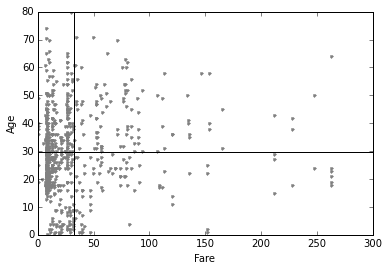

In [11]:
plt.plot(data['Fare'], data['Age'], '.', color='gray')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.axhline(data.Age.mean(), color='black')
plt.axvline(data.Fare.mean(), color='black')
plt.show()

Ah,--the satisfaction of having practically zoomed in on the rest. Now let's see if we can cancel out any other "equals" that might not be helping us much in differentiating between the two genders' survival rate.

So here's the plan: I'm going to dissect this Age vs Fare plot into four sections and analyze them one by one to see if it's possible to farther clean up and/or optimize the data for analysis. But before moving on, I also want to take a look at the age groups and see if I can spot any trends with my naked eyes.

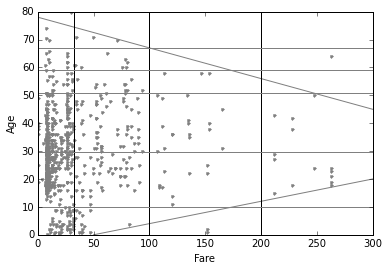

In [12]:
plt.plot(data['Fare'], 
         data['Age'], 
         '.', 
         color='gray')

plt.plot([0, 300], 
         [78, 45], 
         '-', 
         color='gray')

plt.plot([50, 300], 
         [0, 20], 
         '-', 
         color='gray')

plt.xlabel('Fare')
plt.ylabel('Age')

# Vertical/Fare Sections
plt.axvline(data.Fare.mean(), color='black')
plt.axvline(100, color='black')
plt.axvline(200, color='black')

# Horizontal/Age Sections
plt.axhline(data.Age.mean(), color='gray')
plt.axhline(67, color='gray')
plt.axhline(59, color='gray')
plt.axhline(51, color='gray')
plt.axhline(10, color='gray')

plt.show()

It appears that where the fare is above \$100, there may be an equal or insignificant amount of individials. At this point, I am hoping that there's an equal amount of males and females within the same age range who have the same survival outcomes, so that I can drop the part of the set where \$100 or more was paid for the fare. That way, I would be able to just focus on those who paid less than \$100.

It may be hue of me to first take a look at the ones who paid above $200 for their fare, then move to the left with respect to the x-axis.

####Relationship between age and fare, where fare is greater than or equal to $200:

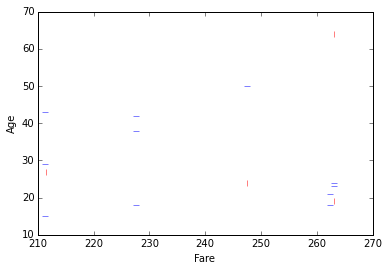

In [13]:
#   |  :  males
#   _  :  females
# blue :  survived
# red  :  did not survive
#   +  :  where the + is the combination of | and _
#         male/female similarity - same color
#         male/female difference - different colors
plt.plot(data['Fare'][data['Fare'] >= 200][data['Survived'] == 1][data['Sex'] == 'male'], 
         data['Age'][data['Fare'] >= 200][data['Survived'] == 1][data['Sex'] == 'male'], 
         'b|')
plt.plot(data['Fare'][data['Fare'] >= 200][data['Survived'] == 1][data['Sex'] == 'female'], 
         data['Age'][data['Fare'] >= 200][data['Survived'] == 1][data['Sex'] == 'female'], 
         'b_')
plt.plot(data['Fare'][data['Fare'] >= 200][data['Survived'] == 0][data['Sex'] == 'male'], 
         data['Age'][data['Fare'] >= 200][data['Survived'] == 0][data['Sex'] == 'male'], 
         'r|')
plt.plot(data['Fare'][data['Fare'] >= 200][data['Survived'] == 0][data['Sex'] == 'female'], 
         data['Age'][data['Fare'] >= 200][data['Survived'] == 0][data['Sex'] == 'female'], 
         'r_')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

It looks like all males who paid above $200 for their fare did not make it, while all females in this group survived. It's also evident that the females outnumber the males. Let's take a closer look:

In [14]:
print data[['Age', 'Survived', 'Sex']][data['Fare'] >= 200].sort('Sex')

     Age  Survived     Sex
380   42         1  female
88    23         1  female
742   21         1  female
299   50         1  female
311   18         1  female
341   24         1  female
730   29         1  female
779   43         1  female
716   38         1  female
689   15         1  female
700   18         1  female
377   27         0    male
118   24         0    male
27    19         0    male
438   64         0    male


No doubt about it. Even though all females survived in this group, while all males did not, the fact that the females outnumber the males by-

In [15]:
f = float(data[['Sex']][data['Fare'] >= 200][data['Sex'] == 'female'].count())
m = float(data[['Sex']][data['Fare'] >= 200][data['Sex'] == 'male'].count())
print str(f / m) + " times"

2.75 times


C:\Users\toor\Anaconda\lib\site-packages\pandas\core\frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


-makes it harder to say that the cost of the fare did not matter and that males somehow did not survive due to some other reason. However, this still supports the fact that a higher fare did not help males survive. This is helpful information in trying to figure out whether one gender had more chances of surviving over the other.

Let's look at the set where the fare cost is between \$100 and \$200.

####Relationship between age and fare, where fare is greater than or equal to \$100 and less than \$200: 

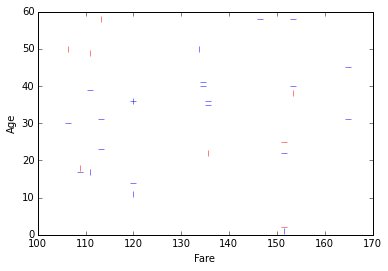

In [16]:
plt.plot(data['Fare'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 1][data['Sex'] == 'male'], 
         data['Age'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 1][data['Sex'] == 'male'], 
         'b|')
plt.plot(data['Fare'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 1][data['Sex'] == 'female'], 
         data['Age'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 1][data['Sex'] == 'female'], 
         'b_')
plt.plot(data['Fare'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 0][data['Sex'] == 'male'], 
         data['Age'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 0][data['Sex'] == 'male'], 
         'r|')
plt.plot(data['Fare'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 0][data['Sex'] == 'female'], 
         data['Age'][data['Fare'] >= 100][data['Fare'] < 200][data['Survived'] == 0][data['Sex'] == 'female'], 
         'r_')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

I think that it's better to look at charts in this situation:

In [17]:
print data[['Age', 'Survived', 'Sex']] \
           [data['Fare'] >= 100]       \
           [data['Fare'] < 200]        \
           [data['Sex'] == 'female']   \
           .sort('Survived')

     Age  Survived     Sex
297    2         0  female
498   25         0  female
195   58         1  female
708   22         1  female
609   40         1  female
581   39         1  female
537   30         1  female
435   14         1  female
393   23         1  female
337   41         1  female
325   36         1  female
319   40         1  female
318   31         1  female
307   17         1  female
269   35         1  female
268   58         1  female
215   31         1  female
763   36         1  female
856   45         1  female


In this subset, it's apparent that most females survived. It just looks like perhaps a mother and her daughter might have been at the wrong place, at the wrong time, since one is 25 and the other is 2 years old. Let's see if the two unlucky females in this group are related. So if they're related, with one being 2 years old, then they are most likely in the same cabin. And one of them would also have to have a parent aboard:

In [18]:
print data[['Age', 'Survived', 'Sex', 'Parch', 'SibSp', 'Cabin']] \
           [data['Fare'] >= 100]                                  \
           [data['Fare'] < 200]                                   \
           [data['Sex'] == 'female']                              \
           [data['Survived'] == 0]

     Age  Survived     Sex  Parch  SibSp    Cabin
297    2         0  female      2      1  C22 C26
498   25         0  female      2      1  C22 C26


Fantastic! They're both in the same cabin, and each have 2 parents or children and 1 sibling or spouse. I'll admit that, that felt good! Although, with 2 parents or children and 1 sibling or spouse each, they look like they could even be siblings. Let's see who else was in their cabin:

In [19]:
print data[['Age', 'Survived', 'Sex', 'Parch', 'SibSp', 'Cabin']] \
           [data['Cabin'] == 'C22 C26']

       Age  Survived     Sex  Parch  SibSp    Cabin
297   2.00         0  female      2      1  C22 C26
305   0.92         1    male      2      1  C22 C26
498  25.00         0  female      2      1  C22 C26


Okay, so it may be that the mother is the 25 year-old who has 2 children (ParCh is 2) who are about 1 year apart in age and both have 2 parents on board (ParCh is 2). The 2 little ones have a sibling each, so they are most likely siblings. The 25 year-old female must have a spouse on board and not a sibling (SibSp is 1), but what's going on is probably that the 'Cabin' data is missing for the spouse who's the father of the 2 kids.

Interesting side-story. We were just checking for other clues, but we probably don't have to dig into how the cabin location might have affected this subset. At this point, we can assume that all the females in this subset would've survived and that the mother and daughter might have not been in their cabin at the time of the event.

Now moving on to the males of this subset:

In [20]:
print data[['Age', 'Survived', 'Sex']] \
           [data['Fare'] >= 100]       \
           [data['Fare'] < 200]        \
           [data['Sex'] == 'male']     \
           .sort('Survived')

       Age  Survived   Sex
332  38.00         0  male
373  22.00         0  male
505  18.00         0  male
544  50.00         0  male
659  58.00         0  male
698  49.00         0  male
305   0.92         1  male
390  36.00         1  male
550  17.00         1  male
660  50.00         1  male
802  11.00         1  male


Males of a variety of ages survived and did not survive; however, in this subset, more than half of the males did not survive. Did the cabin location have an effect on the outcome?

In [21]:
print data[['Age', 'Survived', 'Sex', 'Cabin']] \
           [data['Fare'] >= 100]                \
           [data['Fare'] < 200]                 \
           [data['Sex'] == 'male']              \
           .sort('Cabin')

       Age  Survived   Sex    Cabin
390  36.00         1  male  B96 B98
802  11.00         1  male  B96 B98
305   0.92         1  male  C22 C26
505  18.00         0  male      C65
698  49.00         0  male      C68
550  17.00         1  male      C70
544  50.00         0  male      C86
332  38.00         0  male      C91
659  58.00         0  male      D48
373  22.00         0  male      NaN
660  50.00         1  male      NaN


It seems like C and D cabins turned out bad for the males, but the B cabins were okay. So I want to point this out:

In the cabins before C65: 

In [22]:
print data[['Age', 'Survived', 'Sex', 'Cabin']] \
           [data['Fare'] >= 100]                \
           [data['Fare'] < 200]                 \
           [data['Sex'] == 'male']              \
           [data['Cabin'] < 'C65']              \
           .sort('Cabin')

       Age  Survived   Sex    Cabin
390  36.00         1  male  B96 B98
802  11.00         1  male  B96 B98
305   0.92         1  male  C22 C26


-all males survived.

In cabin C65 and after:

In [23]:
print data[['Age', 'Survived', 'Sex', 'Cabin']] \
           [data['Fare'] >= 100]                \
           [data['Fare'] < 200]                 \
           [data['Sex'] == 'male']              \
           [data['Cabin'] >= 'C65']             \
           .sort('Cabin')

     Age  Survived   Sex Cabin
505   18         0  male   C65
698   49         0  male   C68
550   17         1  male   C70
544   50         0  male   C86
332   38         0  male   C91
659   58         0  male   D48


-most males (5 out of 6) did not.

However, there's not enough data to say much about this, especially because of this: 

In cabin C65 and after: 

In [24]:
print data[['Age', 'Survived', 'Sex', 'Cabin']] \
           [data['Fare'] >= 100]                \
           [data['Fare'] < 200]                 \
           [data['Sex'] == 'female']            \
           [data['Cabin'] >= 'C65']             \
           .sort('Cabin')

     Age  Survived     Sex Cabin
307   17         1  female   C65
581   39         1  female   C68
318   31         1  female    C7
269   35         1  female   C99
393   23         1  female   D36
215   31         1  female   D36
319   40         1  female   E34
337   41         1  female   E40


-all females survived.

The male who survived from the latter group (with 6 males) was a 17 year-old. But we should take note that an 18 year-old male from the same group of 6 did not survive. From the former group (cabins before C65), a variety of ages survived: 0.92, 11, and 36. So far, this is the only evidence that we've found in support of cabin location having had an impact on  survivability for males.

To keep track of the female to male ratios for later:

In [25]:
f = float(data[['Sex']]
              [data['Fare'] >= 100]
              [data['Fare'] < 200]
              [data['Sex'] == 'female'].count())
m = float(data[['Sex']]
              [data['Fare'] >= 100]
              [data['Fare'] < 200]
              [data['Sex'] == 'male'].count())

print "There are " + str(format(f / m, '.2f')) + " times more females in this subset than males."

There are 1.73 times more females in this subset than males.


####Relationship between age and fare among those who paid more than or equal to the average fare and below \$100

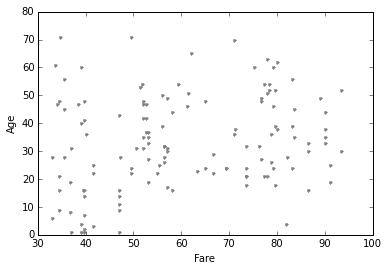

In [26]:
plt.plot(data['Fare'][data['Fare'] >= data['Fare'].mean()][data['Fare'] < 100], 
         data['Age'][data['Fare'] >= data['Fare'].mean()][data['Fare'] < 100], 
         'g.',
         color='gray')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

In [27]:
a = int(data[['Sex']]                     \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'female']          \
       [data['Survived'] == 0]            \
       .count())

b = int(data[['Sex']]                     \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'female']          \
       [data['Survived'] == 1]            \
       .count())

print "In this subset, " + str(b) + " females survived and " + str(a) + " did not."

In this subset, 53 females survived and 6 did not.


Looking into what age groups might have not survived. Keeping in mind that vriety will make age less significant:

In [28]:
data[['Sex', 'Fare', 'Age', 'Survived']]  \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'female']          \
       [data['Survived'] == 0]

,Sex,Fare,Age,Survived
71,female,46.9000,16,0
147,female,34.3750,9,0
436,female,34.3750,21,0
638,female,39.6875,41,0
678,female,46.9000,43,0
736,female,34.3750,48,0


So the minimum age is 9 and the maximum age is 48. This is not a close range, but we should look at those who did survive and see if they all fit within a close range to this. If not, then that could be an indication for the need to investigate why this age group was less likely to survive than the rest. 

In [29]:
data[['Sex', 'Fare', 'Age', 'Survived']]  \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'female']          \
       [data['Survived'] == 1]            \
       .describe()

,Fare,Age,Survived
count,53.000000,53.000000,53
mean,67.536325,33.830189,1
std,16.886894,14.980418,0
min,33.000000,3.000000,1
25%,53.100000,22.000000,1
50%,71.000000,33.000000,1
75%,80.000000,47.000000,1
max,93.500000,63.000000,1


So the minimum age is 3, which is not necessarily close to 9. But the maximum age is 63, which is not too close to 48. This could be an indication that we don't have to investigate the age groups in this subset before feeling comfortable with moving on. I will not dig too deep into this for this project, since, for an academic project, this has already become too large. I need to move on. There is much more to be learned.

As for the males of this subset:

In [30]:
a = int(data[['Sex']]                     \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'male']            \
       [data['Survived'] == 0]            \
       .count())

b = int(data[['Sex']]                     \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'male']            \
       [data['Survived'] == 1]            \
       .count())

print "While " + str(b) + " males survived and " + str(a) + " did not."

While 23 males survived and 51 did not.


Getting the min, max, and mean of the males did not survive:

In [31]:
data[['Sex', 'Fare', 'Age', 'Survived']]  \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'male']            \
       [data['Survived'] == 0]            \
       .describe()

,Fare,Age,Survived
count,51.000000,51.000000,51
mean,55.183498,33.843137,0
std,16.810845,18.715098,0
min,33.000000,1.000000,0
25%,39.687500,20.000000,0
50%,52.000000,31.000000,0
75%,73.500000,47.000000,0
max,90.000000,71.000000,0


And for the males in this subset who did survive:

In [32]:
data[['Sex', 'Fare', 'Age', 'Survived']]  \
       [data['Fare'] >= data.Fare.mean()] \
       [data['Fare'] < 100]               \
       [data['Sex'] == 'male']            \
       [data['Survived'] == 1]            \
       .describe()

,Fare,Age,Survived
count,23.000000,23.000000,23
mean,60.038230,31.173913,1
std,18.014866,16.732256,0
min,35.500000,1.000000,1
25%,52.277100,25.000000,1
50%,56.495800,31.000000,1
75%,76.729200,45.000000,1
max,91.079200,60.000000,1


In both subsets (males who survived and did not survive in this fare group), the minimum age is 1. The maximum age among those who did not survive is 71, but it's 60 among those who did survive.

So far, the age has varied too much and, in the overall sense, seems to be an insignficant factor with respect to survival. It would be interesting to see if children did or did not survive with their parent(s), but we've already observed that, in a possible case, one child of two survived, but the other did not just like the assumed mother.

####Relationship between age and fare among those who paid the minimum and below the average fare.

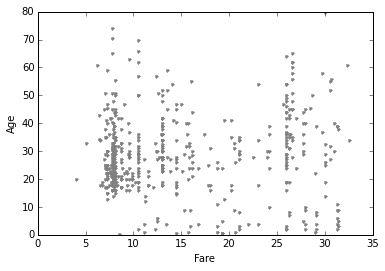

In [33]:
plt.plot(data['Fare'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()], 
         data['Age'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()], 
         'g.',
         color='gray')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

Let's split this graph into groups of 'survived' and 'did not survive':

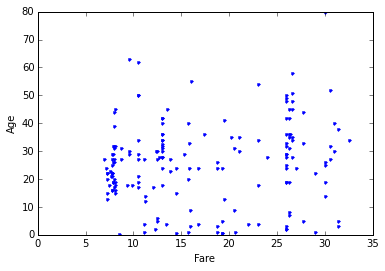

In [34]:
# Survived
plt.plot(data['Fare'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()][data['Survived'] == 1], 
         data['Age'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()][data['Survived'] == 1], 
         'b.')
plt.plot(0, 0, ' ')    # to make the scale match the next graph
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

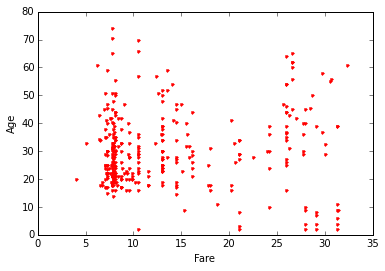

In [35]:
# Did not survive
plt.plot(data['Fare'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()][data['Survived'] == 0], 
         data['Age'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()][data['Survived'] == 0], 
         'r.')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

It appears like some fares gave more chances of not surviving, but comparing to the previous plots, it seems to be due to more people having paid the smaller fare. Let's make a vertical line observation to take a more careful look:

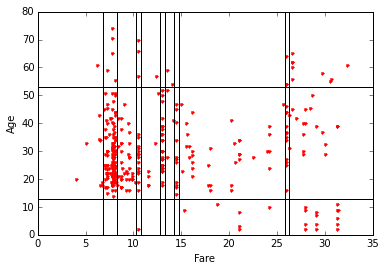

In [36]:
# Did not survive
plt.plot(data['Fare'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()][data['Survived'] == 0], 
         data['Age'][data['Fare'] > 0][data['Fare'] < data['Fare'].mean()][data['Survived'] == 0], 
         'r.')

#plt.axvline(7.25, color='black')
plt.axvline(6.85, color='black')
plt.axvline(8.25, color='black')
#plt.axvline(7.50, color='black')

plt.axvline(10.75, color='black')
plt.axvline(10.25, color='black')

plt.axvline(13.25, color='black')
plt.axvline(12.75, color='black')

plt.axvline(14.25, color='black')
plt.axvline(14.75, color='black')

plt.axvline(26.25, color='black')
plt.axvline(25.85, color='black')

plt.axhline(53, color='black')
plt.axhline(13, color='black')

plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

We can assume that the sample population is considerable with respect to fare. This means that it's more difficult for us to analyze this part of the data. With more people, there are more possibilities.

###Relationship between Fare and Population

####Relationship between fare and population, with average fare specified by a horizontal line:

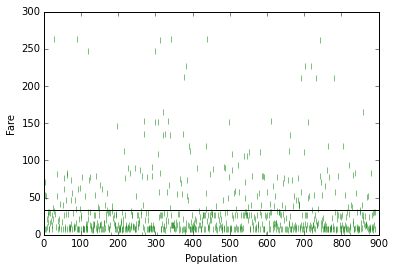

In [37]:
plt.plot(data.PassengerId, data.Fare, 'g|')
plt.xlabel('Population')
plt.ylabel('Fare')
plt.axhline(data.Fare.mean(), color='black')
plt.show()

####Average fare:

In [38]:
average_fare = "$" + str(format(data.Fare.mean(), '.2f'))
print "The majority of individuals paid " + average_fare + " or less for their fare.\n"
print "In fact, " + str((len(data[data['Fare'] <= 32.20])*100)/len(data)) + "% paid the " + average_fare + \
      " average or less."

The majority of individuals paid $32.68 or less for their fare.

In fact, 74% paid the $32.68 average or less.


###Relationship between Fare and Survivability

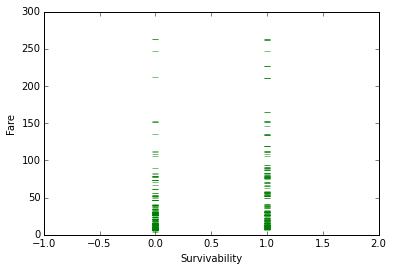

In [39]:
plt.plot(data.Survived, data.Fare, 'g_')
plt.xlabel('Survivability')
plt.ylabel('Fare')
plt.plot(-1, 0,' ')
plt.plot(2, 2,' ')
plt.show()
# 0: did not survive
# 1: survived

####Relationship of fare to male individuals who did (blue) and did not survive (red):

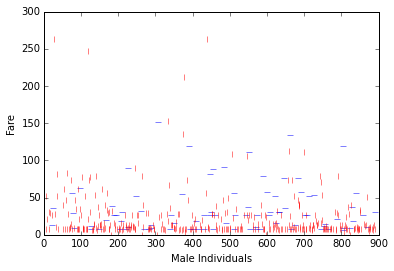

In [40]:
plt.plot(data['PassengerId'][data['Survived'] == 1][data['Sex'] == 'male'], 
         data['Fare'][data['Survived'] == 1][data['Sex'] == 'male'], 
         'b_')
plt.plot(data['PassengerId'][data['Survived'] == 0][data['Sex'] == 'male'], 
         data['Fare'][data['Survived'] == 0][data['Sex'] == 'male'], 
         'r|')
plt.xlabel('Male Individuals')
plt.ylabel('Fare')
#plt.axhline(data.Fare.mean(), color='black')
plt.show()

####Relationship of fare to female individuals who did (blue) and did not survive (red):

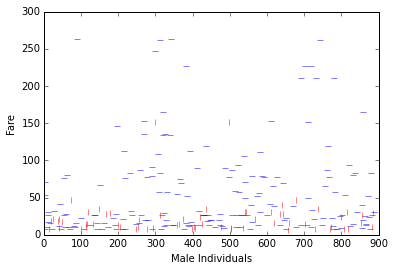

In [41]:
plt.plot(data['PassengerId'][data['Survived'] == 1][data['Sex'] == 'female'], 
         data['Fare'][data['Survived'] == 1][data['Sex'] == 'female'], 
         'b_')
plt.plot(data['PassengerId'][data['Survived'] == 0][data['Sex'] == 'female'], 
         data['Fare'][data['Survived'] == 0][data['Sex'] == 'female'], 
         'r|')
plt.xlabel('Male Individuals')
plt.ylabel('Fare')
#plt.axhline(data.Fare.mean(), color='black')
plt.show()

####Comparison of fare with respect to males (red) and females (blue) who did survive:

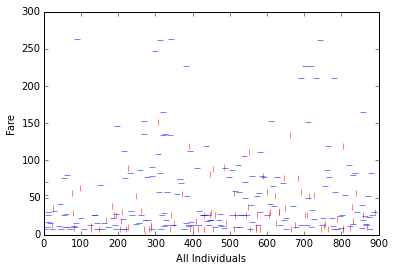

In [42]:
plt.plot(data['PassengerId'][data['Survived'] == 1][data['Sex'] == 'male'], 
         data['Fare'][data['Survived'] == 1][data['Sex'] == 'male'], 
         'r|')
plt.plot(data['PassengerId'][data['Survived'] == 1][data['Sex'] == 'female'], 
         data['Fare'][data['Survived'] == 1][data['Sex'] == 'female'], 
         'b_')
plt.xlabel('All Individuals')
plt.ylabel('Fare')
#plt.axhline(data.Fare.mean(), color='black')
plt.show()

####Comparison of fare with respect to males (red) and females (blue) who did not survive:

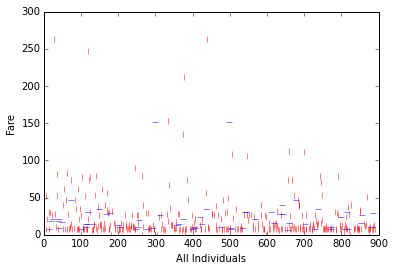

In [43]:
plt.plot(data['PassengerId'][data['Survived'] == 0][data['Sex'] == 'male'], 
         data['Fare'][data['Survived'] == 0][data['Sex'] == 'male'], 
         'r|')
plt.plot(data['PassengerId'][data['Survived'] == 0][data['Sex'] == 'female'], 
         data['Fare'][data['Survived'] == 0][data['Sex'] == 'female'], 
         'b_')
plt.xlabel('All Individuals')
plt.ylabel('Fare')
#plt.axhline(data.Fare.mean(), color='black')
plt.show()

With the survivability scattered all about the fare prices, we can farther assume that the fare price did not directly have an impact on the outcome.

###Relationship between Age and Survivability

Grabbing the ages of those who survived and those who did not survive:

In [44]:
s_fa = pd.DataFrame(data[['Age', 'Sex']][data['Survived'] == 1][data['Sex'] == 'female'])       # survived; females
s_ma = pd.DataFrame(data[['Age', 'Sex']][data['Survived'] == 1][data['Sex'] == 'male'])         # survived; males
n_fa = pd.DataFrame(data[['Age', 'Sex']][data['Survived'] == 0][data['Sex'] == 'female'])       # not survived; females
n_ma = pd.DataFrame(data[['Age', 'Sex']][data['Survived'] == 0][data['Sex'] == 'male'])         # not survived; males

# to continue accountability of the amount of people in the 'Survived' data frame
s_fa_len = len(s_fa.Age)             # quantity of individuals in our survived female set who have age data
s_ma_len = len(s_ma.Age)             # quantity of individuals in our survived male set who have age data
n_fa_len = len(n_fa.Age)             # quantity of individuals in our not survived female set who have age data
n_ma_len = len(n_ma.Age)             # quantity of individuals in our not survived male set who have age data

# used to prevent frequency from being counted more than once, unless the s_a DataFrame is reset here
s_fa_freq_counted = False
s_ma_freq_counted = False
n_fa_freq_counted = False
n_ma_freq_counted = False

# sort the DataFrames by Age
s_fa.Age.values.sort()
s_ma.Age.values.sort()
n_fa.Age.values.sort()
n_ma.Age.values.sort()

####A quick look at the ages of some females who survived:

In [45]:
first_and_last(s_fa, 8)

     Age     Sex
1   0.75  female
2   0.75  female
3   1.00  female
8   1.00  female
9   2.00  female
10  2.00  female
11  3.00  female
15  4.00  female
     Age     Sex
865   56  female
866   58  female
871   58  female
874   58  female
875   60  female
879   62  female
880   63  female
887   63  female


####A quick look at the ages of some males who survived:

In [46]:
first_and_last(s_ma, 8)

      Age   Sex
21   0.42  male
23   0.67  male
74   0.83  male
78   0.83  male
81   0.92  male
97   1.00  male
125  1.00  male
127  1.00  male
     Age   Sex
804   49  male
821   50  male
827   51  male
831   52  male
838   56  male
857   60  male
869   62  male
889   80  male


####Ages of some of the females who did not survive:

In [47]:
first_and_last(n_fa, 5)

    Age     Sex
14    2  female
18    2  female
24    2  female
38    2  female
40    3  female
     Age     Sex
816   45  female
852   47  female
854   48  female
882   50  female
885   57  female


####Ages of some of the males who did not survive:

In [48]:
first_and_last(n_ma, 5)

    Age   Sex
0     1  male
4     1  male
6     2  male
7     2  male
12    2  male
      Age   Sex
881  70.0  male
883  70.5  male
884  71.0  male
886  71.0  male
890  74.0  male


####The amount of females and males who did and did not survive.

In [49]:
# Ones who did survive; both male and female:
print "The amount of the ones who survived."
gender_amount_of(s_fa, s_fa_len, s_ma, s_ma_len)

# Ones who did not survive; both male and female:
print "The amount of the ones who did not survive."
gender_amount_of(n_fa, n_fa_len, n_ma, n_ma_len)

The amount of the ones who survived.
Female count: 196
Male count:   91

The amount of the ones who did not survive.
Female count: 64
Male count:   360



####A quick look at the age statistics of those who survived:

In [50]:
s_fa.describe()

,Age
count,196.000000
mean,28.816327
std,14.204507
min,0.750000
25%,19.000000
50%,28.000000
75%,38.000000
max,63.000000


In [51]:
s_ma.describe()

,Age
count,91.000000
mean,27.095275
std,16.640928
min,0.420000
25%,17.500000
50%,27.000000
75%,36.000000
max,80.000000


####And a quick look at the age statistics of those who did not survive:

In [52]:
n_fa.describe()

,Age
count,64.000000
mean,25.046875
std,13.618591
min,2.000000
25%,16.750000
50%,24.500000
75%,33.250000
max,57.000000


In [53]:
n_ma.describe()

,Age
count,360.000000
mean,31.618056
std,14.056019
min,1.000000
25%,21.750000
50%,29.000000
75%,39.250000
max,74.000000


####Let's compare the two sets: those who survived vs those who did not.

I've taken the route of first computing the difference between its own gender for each, then comparing across the two different genders. But upon a quick observation of the mathematical operations, it becomes evident that it does not matter which order the comparisons are made in, since the outcomes will end up to be exactly the same. So the order of computation is not significant in this situation.

In [54]:
# Variables for the mean
m_s_fa = s_fa.Age.mean(); m_s_ma = s_ma.Age.mean();
m_n_fa = n_fa.Age.mean(); m_n_ma = n_ma.Age.mean();

# Taking the absolute value, so that we don't have to decide which is greater than the other
min_diff_f  = abs(n_fa.Age.min() - s_fa.Age.min())            # relative to its own gender
min_diff_m  = abs(n_ma.Age.min() - s_ma.Age.min())            # relative to its own gender
min_diff_t  = abs(min_diff_f - min_diff_m)                    # compared to each other

mean_diff_f = abs(m_n_fa - m_s_fa)
mean_diff_m = abs(m_n_ma - m_s_ma)
mean_diff_t  = abs(mean_diff_f - mean_diff_m)

max_diff_f  = abs(n_fa.Age.max() - s_fa.Age.max())
max_diff_m  = abs(n_ma.Age.max() - s_ma.Age.max())
max_diff_t  = abs(max_diff_f - max_diff_m)

print "Min difference for females  :  " + str(format(min_diff_f, '.2f')) # minimum female age : Survived - Not_Survived
print "Min difference for males    :  " + str(format(min_diff_m, '.2f')) # minimum male age   : Survived - Not_Survived
print "Min difference in total     :  " + str(format(min_diff_t, '.2f')) # minimum age (total): Survived - Not_Survived
print

print "Mean difference for females :  " + str(format(mean_diff_f, '.2f')) # mean female age : Survived - Not_Survived
print "Mean difference for males   :  " + str(format(mean_diff_m, '.2f')) # mean male age   : Survived - Not_Survived
print "Mean difference in total    :  " + str(format(mean_diff_t, '.2f')) # mean age (total): Survived - Not_Survived
print

print "Max difference for females  :  " + str(format(max_diff_f, '.2f')) # maximum female age : Survived - Not_Survived
print "Max difference for males    :  " + str(format(max_diff_m, '.2f')) # maximum male age   : Survived - Not_Survived
print "Max difference in total     :  " + str(format(max_diff_t, '.2f')) # maximum age (total): Survived - Not_Survived

Min difference for females  :  1.25
Min difference for males    :  0.58
Min difference in total     :  0.67

Mean difference for females :  3.77
Mean difference for males   :  4.52
Mean difference in total    :  0.75

Max difference for females  :  6.00
Max difference for males    :  6.00
Max difference in total     :  0.00


So the relevance of age to survivability seems to be very close for both genders and situations (survived vs not survived); even though, the quantity of those who did not survive is significantly different compared to the quantity of those who did survive, for both genders.

###Relationship between Age and Gender

####Clean up all four DataFrames

Now it's time to re-order the DataFrames; count the quantity of individuals for each age in the DataFrames; drop all of the duplicates; and reset the index, so that it looks easier on the eyes.

In [55]:
# Clean up all four DataFrames
s_fa, s_fa_freq_counter = clean_data(s_fa, s_fa_len, s_fa_freq_counted)
s_ma, s_ma_freq_counter = clean_data(s_ma, s_ma_len, s_ma_freq_counted)
n_fa, n_fa_freq_counter = clean_data(n_fa, n_fa_len, n_fa_freq_counted)
n_ma, n_ma_freq_counter = clean_data(n_ma, n_ma_len, n_ma_freq_counted)

This way, we can take a quick peek at each of the four DataFrames to see how things are looking. By the way, I like keeping the 'Sex' column in each, regardless of the fact that it'll say the same thing. I actually like to be reminded in this way, and it's always good to be able to double-check whether something funny might have happened in the data clean-up process.

In [56]:
# Survived; female
first_and_last(s_fa, 5)

    Age     Sex  Quantity
0  0.75  female         2
1  1.00  female         2
2  2.00  female         2
3  3.00  female         1
4  4.00  female         5
    Age     Sex  Quantity
50   56  female         1
51   58  female         3
52   60  female         1
53   62  female         1
54   63  female         2


In [57]:
# Survived; male
first_and_last(s_ma, 5)

    Age   Sex  Quantity
0  0.42  male         1
1  0.67  male         1
2  0.83  male         2
3  0.92  male         1
4  1.00  male         3
    Age   Sex  Quantity
44   52  male         1
45   56  male         1
46   60  male         1
47   62  male         1
48   80  male         1


I'm going to purposely be inconsistent here to show the usefulness of my convenient function:

In [58]:
# Not survived; female
first_and_last(n_fa, 10)

    Age     Sex  Quantity
0   2.0  female         4
1   3.0  female         1
2   6.0  female         1
3   8.0  female         1
4   9.0  female         4
5  10.0  female         1
6  11.0  female         1
7  14.0  female         1
8  14.5  female         1
9  16.0  female         1
    Age     Sex  Quantity
28   39  female         2
29   40  female         1
30   41  female         2
31   43  female         1
32   44  female         1
33   45  female         3
34   47  female         1
35   48  female         1
36   50  female         1
37   57  female         1


In [59]:
# Not survived; male
first_and_last(n_ma, 10)

   Age   Sex  Quantity
0    1  male         2
1    2  male         3
2    4  male         3
3    7  male         2
4    8  male         1
5    9  male         2
6   10  male         1
7   11  male         2
8   14  male         2
9   15  male         1
     Age   Sex  Quantity
64  60.0  male         2
65  61.0  male         3
66  62.0  male         2
67  64.0  male         2
68  65.0  male         3
69  66.0  male         1
70  70.0  male         2
71  70.5  male         1
72  71.0  male         2
73  74.0  male         1


####It's time to start digging around the cleaned-up data:

Survived; female:

In [60]:
split_average_age(s_fa)

Younger-half: 119
Older-half:   77

There are 42 more individuals in the younger half.


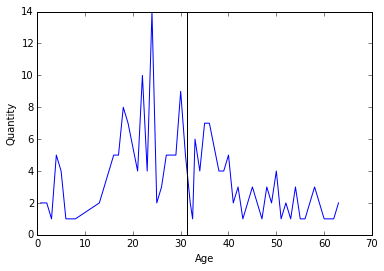

In [61]:
plt.plot(s_fa.Age, s_fa.Quantity, 'b-')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.axvline(s_fa.Age.mean(), color='black')
plt.show()

Survived; male:

In [62]:
split_average_age(s_ma)

Younger-half: 46
Older-half:   45
There is 1 more individual in the younger half.


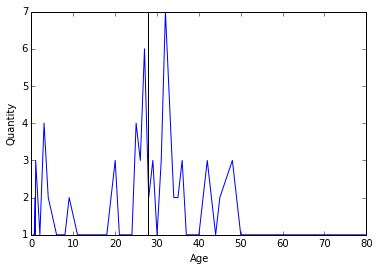

In [63]:
plt.plot(s_ma.Age, s_ma.Quantity, 'b-')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.axvline(s_ma.Age.mean(), color='black')
plt.show()

Not survived; female:

In [64]:
split_average_age(n_fa)

Younger-half: 38
Older-half:   26

There are 12 more individuals in the younger half.


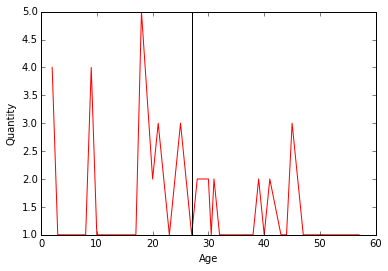

In [65]:
plt.plot(n_fa.Age, n_fa.Quantity, 'r-')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.axvline(n_fa.Age.mean(), color='black')
plt.show()

Not survived; male:

In [66]:
split_average_age(n_ma)

Younger-half: 254
Older-half:   106

There are 148 more individuals in the younger half.


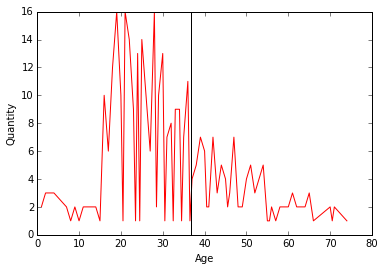

In [67]:
plt.plot(n_ma.Age, n_ma.Quantity, 'r-')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.axvline(n_ma.Age.mean(), color='black')
plt.show()

Before moving on, let's review the type of data that's available in this dataset.

In [68]:
list(data.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

PassengerId - a number given to each passenger from 1 to the max of total. This has already come in handy for plotting the fare over the population sample, since every person can have a spot on the x-axis.

Survived - '1' for did; '0' for did not. Absolutely necessary for this investigation.

Pclass - passenger class (1 - 1st, 2 - 2nd, 3 - 3rd).

Name - unnecessary for this investigation.

Sex - gender, shown as 'female' and 'male.' One of the most necessary columns in this case.

Age - self-explanatory.

SibSp - number of siblings or spouse aboard the ship.

Parch - number of parents or children aboard the ship.

Ticket - ticket number.

Fare - amount of money paid for the ticket.

Cabin - where the cabin is.

Embarked - which port the passenger came from (C - Cherbourg; Q - Queenstown; S - Southampton).

####Gender analysis

Total females:

In [69]:
t_f = data['Survived'][data['Sex'] == 'female']
total_females = get_count(t_f)

260.0


Total males:

In [70]:
t_m = data['Survived'][data['Sex'] == 'male']
total_males = get_count(t_m)

451.0


Amount of females who survived:

In [71]:
s_f = data['Survived'][data['Survived'] == 1][data['Sex'] == 'female']
survived_females = get_count(s_f)

196.0


Amount of males who survived:

In [72]:
s_m = data['Survived'][data['Survived'] == 1][data['Sex'] == 'male']
survived_males = get_count(s_m)

91.0


Amount of females who did not survive:

In [73]:
notSurvived_females = diff(total_females, survived_females)

64.0


Amount of males who did not survive:

In [74]:
notSurvived_males = diff(total_males, survived_males)

360.0


Percentage of females who survived:

In [75]:
percent_of(survived_females, total_females)

75.38461538461539

Percentage of males who survived:

In [76]:
percent_of(survived_males, total_males)

20.177383592017737

Total females and males in the set:

In [77]:
total = total_females + total_males
total

711.0

Percentage of females in total set:

In [78]:
percent_of(total_females, total)

36.56821378340366

Percentage of males in total set:

In [79]:
percent_of(total_males, total)

63.43178621659634

Percentage of female survivors over total set:

In [80]:
s_f_percent = percent_of(survived_females, total)
s_f_percent

27.566807313642755

Percentage of male survivors over total set:

In [81]:
s_m_percent = percent_of(survived_males, total)
s_m_percent

12.79887482419128

Percentage of all survivors in the whole set:

In [82]:
survivors = (survived_females + survived_males)

s_t_percent = percent_of(survivors, total)
s_t_percent

40.365682137834035

Percentage of females over the total survivors set:

In [83]:
percent_of(s_f_percent, s_t_percent)

68.29268292682927

Percentage of males over the total survivors set:

In [84]:
percent_of(s_m_percent, s_t_percent)

31.70731707317073

###Plots

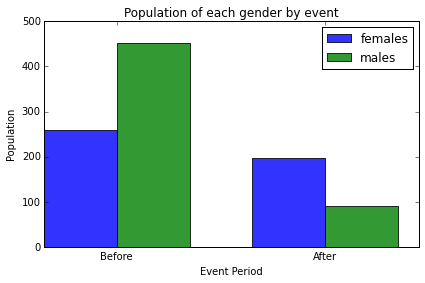

In [85]:
# declare and also reset (in the case of a new run)
females = 0; males = 0;

# add the necessary data to the two tuples
females = add_to_tuple(females, total_females);
females = add_to_tuple(females, survived_females);
males = add_to_tuple(males, total_males);
males = add_to_tuple(males, survived_males);

# create plot
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, females, bar_width,
                 alpha=opacity,
                 color='b',
                 label='females')
 
rects2 = plt.bar(index + bar_width, males, bar_width,
                 alpha=opacity,
                 color='g',
                 label='males')
 
plt.xlabel('Event Period')
plt.ylabel('Population')
plt.title('Population of each gender by event')
plt.xticks(index + bar_width, ('Before', 'After'))
plt.legend()
plt.tight_layout()

plt.show()

###Conclusion

Before the disastrous event occurred, the male population on the Titanic outnumbered the female population by nearly two times:

In [86]:
print format(total_males / total_females, '.2f')

1.73


But during the tragic event, regardless of age, fare, or cabin location, males had over three times the chances of not surviving than females:

In [87]:
male_death_rate = ((total_males - survived_males) / total_males)               # 0.798226
female_death_rate = ((total_females - survived_females) / total_females)       # 0.246154

print format(male_death_rate / female_death_rate, '.2f')

3.24


After the event occurred, the female population outnumbered the male population by over two times:

In [88]:
print format(survived_females / survived_males, '.2f')

2.15


However, there wasn't enough data to more accurately answer the question. This dataset includes information for 891 individuals who were aboard the Titanic during the disaster. Based off of the information posted on TitanicUniverse.com, there were 2,223 passengers aboard the Titanic during the disaster and 1,517 of them did not survive.

###Source

Dataset description:

https://www.kaggle.com/c/titanic/data

Further details about the Titanic disaster:

 http://www.titanicuniverse.com/how-many-people-died-on-the-titanic/1223

Artist's rendition of the Titanic's demise (by Esai Alfredo):

http://esai8mellows.deviantart.com/art/100-anniversary-Titanic-sinking-297834272